In [6]:
#Conventional way to import pandas
import pandas as pd

data= pd.read_csv('Advertising.csv', index_col=0)

#display first 5 rows 
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
#display last 5 rows 
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 4)

In [9]:
import seaborn as sns

%matplotlib inline

C:\Users\Tarun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


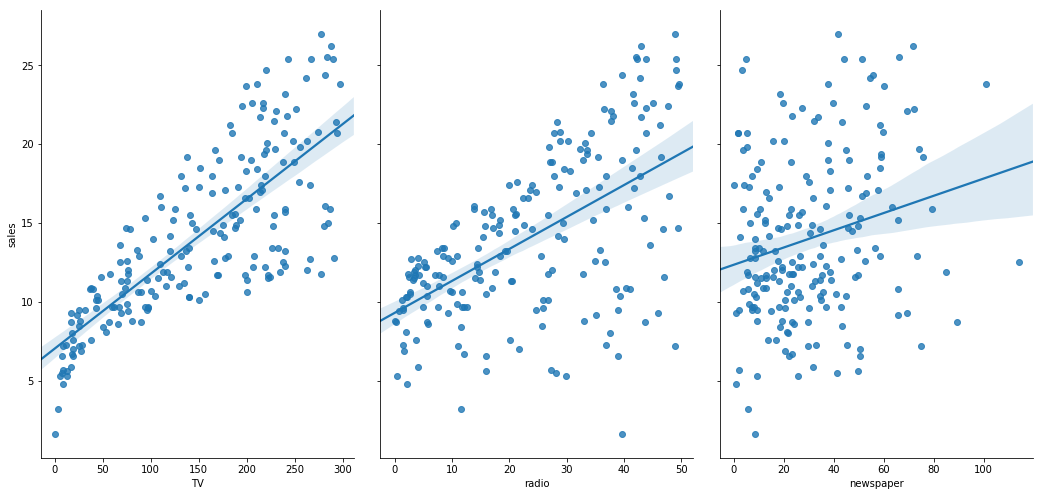

In [15]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars=['sales'] ,height=7 ,aspect=0.7 ,kind = 'reg')

In [23]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]


# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [26]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [28]:
y = data['sales']

y = data.sales

y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [31]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y in training and testing sets 

In [53]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.4,random_state=1 )

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(80, 3)
(120,)
(80,)


In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
print(linreg.intercept_)
print(linreg.coef_)

3.07538281670522
[0.04475753 0.18434893 0.00279513]


In [57]:
zip(feature_cols, linreg.coef_)

In [58]:
 y_pred = linreg.predict(X_test)

In [59]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [60]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [61]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [64]:
#calculate root mean square error
import numpy as np
print (np.sqrt((10**2 +0**2+ 20**2 + 10**2)/4.))

print (np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


In [68]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.5635772207961518
